In [1]:
options(jupyter.plot_mimetypes = c("image/png"))

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

## For loading Arial font for publication
# library(extrafont)

# font_import(pattern = "Arial", prompt = FALSE)
# loadfonts(device = "pdf")

In [2]:
# Read the master df
master_csv <- "resources/carrier.genes.plus_actual_at_risk_birth_rate.csv"
master_df <- read.csv(file = master_csv, header = TRUE, sep = ",", stringsAsFactors = FALSE)

In [3]:
# Define custom colors for ACMG tiers
custom_colors <- c(
  "tier_1" = "#6F9BFF", 
  "tier_2" = "#E2695F", 
  "tier_3" = "#71EDBC", 
  "tier_4" = "#FEE54C", 
  "grey" = "#333333", 
  "light_grey" = "#CCCCCC"
)

## Tiering plots - ACMG tiers across populations

In [4]:
NFE_df <- master_df %>% 
    select(gene, acmg_tier_gnomAD.NFE, carrier_rate_gnomAD.NFE) %>%
    rename(acmg_tier = acmg_tier_gnomAD.NFE, carrier_rate = carrier_rate_gnomAD.NFE) %>% 
    filter(acmg_tier != "tier_4")

# Treat the acmg_tier as a factor
NFE_df$acmg_tier <- factor(NFE_df$acmg_tier, levels = c("tier_1", "tier_2", "tier_3"))

# Sort the data frame by acmg_tier then carrier_rate
NFE_df <- NFE_df %>%
  arrange(acmg_tier, desc(carrier_rate))

# Fill NA with 0
NFE_df[is.na(NFE_df)] <- 0

# Add a column indicating the rank of each gene within the dataframe
NFE_df <- NFE_df %>%
  mutate(rank = row_number())

# Calculate the cumulative sum of carrier_rate
NFE_df <- NFE_df %>%
  mutate(cumulative_sum = cumsum(carrier_rate))

# Add a dummy entry for each tier, indicating the end of the last tier
t1_df <- NFE_df %>% filter(acmg_tier == "tier_1")
t2_df <- NFE_df %>% filter(acmg_tier == "tier_2")
t3_df <- NFE_df %>% filter(acmg_tier == "tier_3")
dummy_df <- data.frame(
    rank = c(
        0, 
        t1_df[nrow(t1_df),'rank'], 
        t2_df[nrow(t2_df),'rank']
    ), 
    cumulative_sum = c(
        0, 
        t1_df[nrow(t1_df),'cumulative_sum'], 
        t2_df[nrow(t2_df),'cumulative_sum']
    ), 
    acmg_tier = c("tier_1", "tier_2", "tier_3")
)
NFE_df <- NFE_df %>% 
  bind_rows(dummy_df) %>% 
  arrange(acmg_tier, cumulative_sum)  # Reorder the data

NFE_df$Population <- "European"    # Mark the Population

In [5]:
AFR_df <- master_df %>% 
    select(gene, acmg_tier_gnomAD.AFR, carrier_rate_gnomAD.AFR) %>%
    rename(acmg_tier = acmg_tier_gnomAD.AFR, carrier_rate = carrier_rate_gnomAD.AFR) %>% 
    filter(acmg_tier != "tier_4")

# Treat the acmg_tier as a factor
AFR_df$acmg_tier <- factor(AFR_df$acmg_tier, levels = c("tier_1", "tier_2", "tier_3"))

# Sort the data frame by acmg_tier then carrier_rate
AFR_df <- AFR_df %>%
  arrange(acmg_tier, desc(carrier_rate))

# Fill NA with 0
AFR_df[is.na(AFR_df)] <- 0

# Add a column indicating the rank of each gene within the dataframe
AFR_df <- AFR_df %>%
  mutate(rank = row_number())

# Calculate the cumulative sum of carrier_rate
AFR_df <- AFR_df %>%
  mutate(cumulative_sum = cumsum(carrier_rate))

# Add a dummy entry for each tier, indicating the end of the last tier
t1_df <- AFR_df %>% filter(acmg_tier == "tier_1")
t2_df <- AFR_df %>% filter(acmg_tier == "tier_2")
t3_df <- AFR_df %>% filter(acmg_tier == "tier_3")
dummy_df <- data.frame(
    rank = c(
        0, 
        t1_df[nrow(t1_df),'rank'], 
        t2_df[nrow(t2_df),'rank']
    ), 
    cumulative_sum = c(
        0, 
        t1_df[nrow(t1_df),'cumulative_sum'], 
        t2_df[nrow(t2_df),'cumulative_sum']
    ), 
    acmg_tier = c("tier_1", "tier_2", "tier_3")
)
AFR_df <- AFR_df %>% 
  bind_rows(dummy_df) %>% 
  arrange(acmg_tier, cumulative_sum)  # Reorder the data

AFR_df$Population <- "African"    # Mark the Population

In [6]:
EAS_df <- master_df %>% 
    select(gene, acmg_tier_gnomAD.EAS, carrier_rate_gnomAD.EAS) %>%
    rename(acmg_tier = acmg_tier_gnomAD.EAS, carrier_rate = carrier_rate_gnomAD.EAS) %>% 
    filter(acmg_tier != "tier_4")

# Treat the acmg_tier as a factor
EAS_df$acmg_tier <- factor(EAS_df$acmg_tier, levels = c("tier_1", "tier_2", "tier_3"))

# Sort the data frame by acmg_tier then carrier_rate
EAS_df <- EAS_df %>%
  arrange(acmg_tier, desc(carrier_rate))

# Fill NA with 0
EAS_df[is.na(EAS_df)] <- 0

# Add a column indicating the rank of each gene within the datEASame
EAS_df <- EAS_df %>%
  mutate(rank = row_number())

# Calculate the cumulative sum of carrier_rate
EAS_df <- EAS_df %>%
  mutate(cumulative_sum = cumsum(carrier_rate))

# Add a dummy entry for each tier, indicating the end of the last tier
t1_df <- EAS_df %>% filter(acmg_tier == "tier_1")
t2_df <- EAS_df %>% filter(acmg_tier == "tier_2")
t3_df <- EAS_df %>% filter(acmg_tier == "tier_3")
dummy_df <- data.frame(
    rank = c(
        0, 
        t1_df[nrow(t1_df),'rank'], 
        t2_df[nrow(t2_df),'rank']
    ), 
    cumulative_sum = c(
        0, 
        t1_df[nrow(t1_df),'cumulative_sum'], 
        t2_df[nrow(t2_df),'cumulative_sum']
    ), 
    acmg_tier = c("tier_1", "tier_2", "tier_3")
)
EAS_df <- EAS_df %>% 
  bind_rows(dummy_df) %>% 
  arrange(acmg_tier, cumulative_sum)  # Reorder the data

EAS_df$Population <- "East Asian"    # Mark the Population

In [7]:
CHI_df <- master_df %>% 
    select(gene, acmg_tier_hkgi, carrier_rate_hkgi) %>%
    rename(acmg_tier = acmg_tier_hkgi, carrier_rate = carrier_rate_hkgi) %>% 
    filter(acmg_tier != "tier_4")

# Treat the acmg_tier as a factor
CHI_df$acmg_tier <- factor(CHI_df$acmg_tier, levels = c("tier_1", "tier_2", "tier_3"))

# Sort the data frame by acmg_tier then carrier_rate
CHI_df <- CHI_df %>%
  arrange(acmg_tier, desc(carrier_rate))

# Fill NA with 0
CHI_df[is.na(CHI_df)] <- 0

# Add a column indicating the rank of each gene within the datCHIame
CHI_df <- CHI_df %>%
  mutate(rank = row_number())

# Calculate the cumulative sum of carrier_rate
CHI_df <- CHI_df %>%
  mutate(cumulative_sum = cumsum(carrier_rate))

# Add a dummy entry for each tier, indicating the end of the last tier
t1_df <- CHI_df %>% filter(acmg_tier == "tier_1")
t2_df <- CHI_df %>% filter(acmg_tier == "tier_2")
t3_df <- CHI_df %>% filter(acmg_tier == "tier_3")
dummy_df <- data.frame(
    rank = c(
        0, 
        t1_df[nrow(t1_df),'rank'], 
        t2_df[nrow(t2_df),'rank']
    ), 
    cumulative_sum = c(
        0, 
        t1_df[nrow(t1_df),'cumulative_sum'], 
        t2_df[nrow(t2_df),'cumulative_sum']
    ), 
    acmg_tier = c("tier_1", "tier_2", "tier_3")
)
CHI_df <- CHI_df %>% 
  bind_rows(dummy_df) %>% 
  arrange(acmg_tier, cumulative_sum)  # Reorder the data

CHI_df$Population <- "Chinese"    # Mark the Population

In [8]:
combined_df <- rbind(NFE_df, AFR_df, EAS_df, CHI_df)
combined_df$Population <- factor(combined_df$Population, levels = c("European", "African", "East Asian", "Chinese"))
combined_df <- combined_df %>% 
    select(Population, acmg_tier, rank, cumulative_sum)

## Tiering plot - ACMG tiers vs HKGP tiers

In [9]:
hkgp_eas_df <- master_df %>% 
    select(gene, tier_hkgi, carrier_rate_gnomAD.EAS) %>%
    rename(tier = tier_hkgi, carrier_rate = carrier_rate_gnomAD.EAS) %>% 
    filter(tier != "tier_4")

hkgp_eas_df$tier <- gsub("tier_3_xlink", "tier_3", hkgp_eas_df$tier)    # Convert tier_3_xlink to tier_3
hkgp_eas_df[is.na(hkgp_eas_df)] <- 0    # Fill NA with 0

# Sort
hkgp_eas_df$tier <- factor(hkgp_eas_df$tier, levels = c("tier_1", "tier_2", "tier_3"))
hkgp_eas_df <- hkgp_eas_df %>%
  arrange(tier, desc(carrier_rate))

# Add a column indicating the rank of each gene within the dataframe
hkgp_eas_df <- hkgp_eas_df %>%
  mutate(rank = row_number())

# Calculate the cumulative sum of carrier_rate
hkgp_eas_df <- hkgp_eas_df %>%
  mutate(cumulative_sum = cumsum(carrier_rate))

# Add a dummy entry for each tier, indicating the end of the last tier
t1_df <- hkgp_eas_df %>% filter(tier == "tier_1")
t2_df <- hkgp_eas_df %>% filter(tier == "tier_2")
t3_df <- hkgp_eas_df %>% filter(tier == "tier_3")   
dummy_df <- data.frame(
    rank = c(
        0, 
        t1_df[nrow(t1_df),'rank'], 
        t2_df[nrow(t2_df),'rank']
    ), 
    cumulative_sum = c(
        0, 
        t1_df[nrow(t1_df),'cumulative_sum'], 
        t2_df[nrow(t2_df),'cumulative_sum']
    ), 
    tier = c("tier_1", "tier_2", "tier_3")
)
hkgp_eas_df <- hkgp_eas_df %>% 
  bind_rows(dummy_df) %>% 
  arrange(tier, cumulative_sum)  # Reorder the data
hkgp_eas_df$Population <- "East Asian on HKGP tiers"    # Mark the Population

In [10]:
hkgp_chi_df <- master_df %>% 
    select(gene, tier_hkgi, carrier_rate_hkgi) %>%
    rename(tier = tier_hkgi, carrier_rate = carrier_rate_hkgi) %>% 
    filter(tier != "tier_4")

hkgp_chi_df$tier <- gsub("tier_3_xlink", "tier_3", hkgp_chi_df$tier)    # Convert tier_3_xlink to tier_3
hkgp_chi_df[is.na(hkgp_chi_df)] <- 0    # Fill NA with 0

# Sort
hkgp_chi_df$tier <- factor(hkgp_chi_df$tier, levels = c("tier_1", "tier_2", "tier_3"))
hkgp_chi_df <- hkgp_chi_df %>%
  arrange(tier, desc(carrier_rate))

# Add a column indicating the rank of each gene within the dataframe
hkgp_chi_df <- hkgp_chi_df %>%
  mutate(rank = row_number())

# Calculate the cumulative sum of carrier_rate
hkgp_chi_df <- hkgp_chi_df %>%
  mutate(cumulative_sum = cumsum(carrier_rate))

# Add a dummy entry for each tier, indicating the end of the last tier
t1_df <- hkgp_chi_df %>% filter(tier == "tier_1")
t2_df <- hkgp_chi_df %>% filter(tier == "tier_2")
t3_df <- hkgp_chi_df %>% filter(tier == "tier_3")
dummy_df <- data.frame(
    rank = c(
        0, 
        t1_df[nrow(t1_df),'rank'], 
        t2_df[nrow(t2_df),'rank']
    ), 
    cumulative_sum = c(
        0, 
        t1_df[nrow(t1_df),'cumulative_sum'], 
        t2_df[nrow(t2_df),'cumulative_sum']
    ), 
    tier = c("tier_1", "tier_2", "tier_3")
)
hkgp_chi_df <- hkgp_chi_df %>% 
  bind_rows(dummy_df) %>% 
  arrange(tier, cumulative_sum)  # Reorder the data
hkgp_chi_df$Population <- "Chinese on HKGP tiers"    # Mark the Population

In [11]:
tail(hkgp_chi_df)

,gene,tier,carrier_rate,rank,cumulative_sum,Population
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
58,MEFV,tier_3,0.00515,55,1.06472,Chinese on HKGP tiers
59,DNAAF6,tier_3,0.00117,56,1.06589,Chinese on HKGP tiers
60,RS1,tier_3,0.00085,57,1.06674,Chinese on HKGP tiers
61,EDA,tier_3,0.00085,58,1.06759,Chinese on HKGP tiers
62,GLA,tier_3,0.00075,59,1.06834,Chinese on HKGP tiers
63,DMD,tier_3,0.00053,60,1.06887,Chinese on HKGP tiers


In [12]:
tail(CHI_df)

,gene,acmg_tier,carrier_rate,rank,cumulative_sum,Population
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
102,FMR1,tier_3,0,99,0.62589,Chinese
103,NR0B1,tier_3,0,100,0.62589,Chinese
104,L1CAM,tier_3,0,101,0.62589,Chinese
105,ARX,tier_3,0,102,0.62589,Chinese
106,AFF2,tier_3,0,103,0.62589,Chinese
107,PLP1,tier_3,0,104,0.62589,Chinese


In [13]:
# Get subset of combined_df for East Asian and Chinese populations
plot2_df <- combined_df %>% 
    filter(Population == "East Asian" | Population == "Chinese") %>% 
    rename(tier = acmg_tier)

# Add "on ACMG tiers" to the Population 
plot2_df$Population <- gsub("East Asian", "East Asian on ACMG tiers", plot2_df$Population)
plot2_df$Population <- gsub("Chinese", "Chinese on ACMG tiers", plot2_df$Population)

In [14]:
plot2_df <- rbind(
    plot2_df, 
    hkgp_eas_df %>% 
        select(Population, tier, rank, cumulative_sum), 
    hkgp_chi_df %>% 
        select(Population, tier, rank, cumulative_sum)
)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


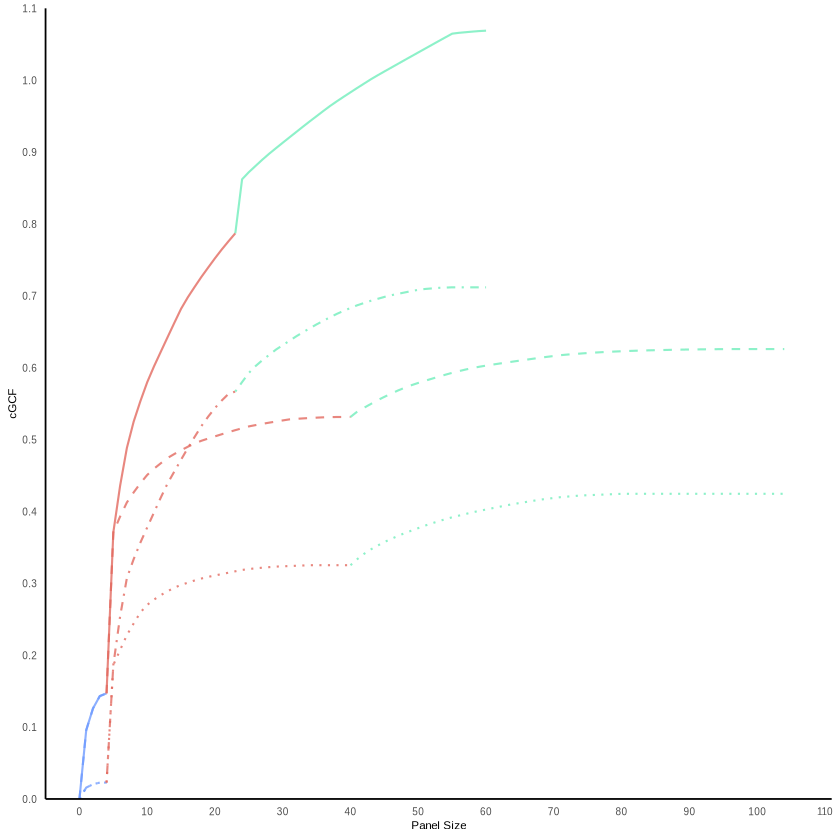

In [15]:
line2_plot <- ggplot(
    plot2_df %>% filter(tier == "tier_1" | tier == "tier_2" | tier == "tier_3"), 
    aes(x = rank, y = cumulative_sum, color = tier, linetype = Population)
  ) +
    # Reduce line width to 0.6 and add alpha for transparency
  geom_line(size = 0.6, alpha = 0.8) +
  scale_color_manual(
    values = c(
      "tier_1" = custom_colors[["tier_1"]],
      "tier_2" = custom_colors[["tier_2"]],
      "tier_3" = custom_colors[["tier_3"]]
    )
  ) +
  scale_linetype_manual(
    values = c(
      "Chinese on HKGP tiers" = "solid",
      "East Asian on HKGP tiers" = "dotdash",
      "East Asian on ACMG tiers" = "dotted",
      "Chinese on ACMG tiers" = "dashed"
    ),
    labels = c(
      "Chinese on HKGP tiers" = "Chinese on HKGP tiers",
      "East Asian on HKGP tiers" = "East Asian on HKGP tiers",
      "East Asian on ACMG tiers" = "East Asian on ACMG tiers",
      "Chinese on ACMG tiers" = "Chinese on ACMG tiers"
    )
  ) +
  labs(
    title = "",
    x = "Panel Size",
    y = "cGCF",
    color = "Tier",
    linetype = "Population"
  ) + 
  scale_x_continuous(
    breaks = seq(0, 111, by = 10),  # Set y-axis ticks at 5% intervals
    limits = c(-5, 111), 
    expand = c(0, 0)  # Remove space at the bottom of the y-axis
  ) + 
  scale_y_continuous(
    breaks = seq(0, 1.1, by = 0.1),  # Set y-axis ticks at 5% intervals
    limits = c(0, 1.1), 
    expand = c(0, 0)  # Remove space at the bottom of the y-axis
  ) + 
  
  # theme_minimal(base_family = "Arial") +
  theme_minimal() +
  theme(
    # plot.title = element_text(size = 14, hjust = 0.5), 
    plot.title = element_blank(),
    panel.grid = element_blank(), 
    axis.line = element_line(color = "black"),
    axis.title.y = element_text(size = 7),
    axis.title.x = element_text(size = 7),
    axis.text.y = element_text(size = 6),
    axis.text.x = element_text(size = 6),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    # legend.position = c(0.9, 0.3), 
    legend.position = "none",
    legend.title = element_text(size = 6),
    legend.text = element_text(size = 5),
    # Reduce spacing between legend elements
    legend.spacing.x = unit(0.05, "cm"),
    legend.spacing.y = unit(0.05, "cm"),
    legend.margin = margin(0, 0, 0, 0),
    # Make legend more compact
    legend.key.height = unit(0.25, "cm"),
    legend.key.width = unit(0.6, "cm"),
    # Optional: adjust legend box spacing
    legend.box.spacing = unit(0.1, "cm"),
    plot.margin = margin(5, 5, 5, 5)
  )


line2_plot


# # Save the plot
# ggsave(
#   filename = "results/secondary/recessive/main/hkgp_tier_cGCF.pdf",
#   plot = line2_plot,
#   width = 60, height = 60,
# 	units = "mm", dpi = 600
# )